<a href="https://colab.research.google.com/github/leonardoub/SCRIPT_PALERMO/blob/master/Histogram_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

#Load data

In [4]:
#load data from Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
train_dataset_path = '/gdrive/My Drive/AIM_PA/database_training2.csv'
test_dataset_path = '/gdrive/My Drive/AIM_PA/database_nostro_without_nan.csv'

In [0]:
df_train = pd.read_csv(train_dataset_path)
df_test = pd.read_csv(test_dataset_path)

In [0]:
df_train.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_test.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_train.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)
df_test.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)

In [0]:
public_data = df_train.drop(['Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
PA_data = df_test.drop(['Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
public_labels = df_train.Histology

In [0]:
PA_labels = df_test.Histology

In [14]:
public_data.columns

Index(['Histology', 'VoxelVolume', 'Maximum3DDiameter', 'MeshVolume',
       'MajorAxisLength', 'Sphericity', 'LeastAxisLength', 'Elongation',
       'SurfaceVolumeRatio', 'Maximum2DDiameterSlice',
       ...
       'HighGrayLevelZoneEmphasis', 'SmallAreaEmphasis',
       'LowGrayLevelZoneEmphasis', 'ZoneEntropy',
       'SmallAreaLowGrayLevelEmphasis', 'Coarseness', 'Complexity', 'Strength',
       'Contrast.1', 'Busyness'],
      dtype='object', length=108)

#Histograms

In [15]:
public_data.hist(public_data, by=public_data['Histology'], figsize=(30, 30))

TypeError: ignored

In [0]:
colors = {'adenocarcinoma': 'r', 'large cell': 'b', 'squamous cell carcinoma': 'g'}

Histology
adenocarcinoma             AxesSubplot(0.125,0.125;0.775x0.755)
large cell                 AxesSubplot(0.125,0.125;0.775x0.755)
squamous cell carcinoma    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Maximum, dtype: object

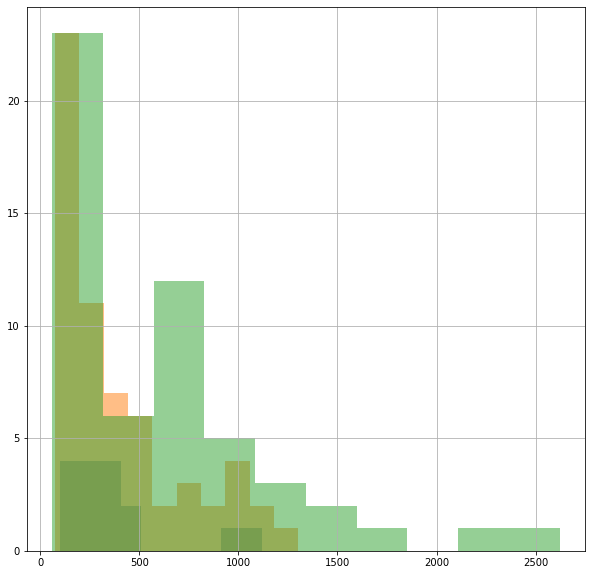

In [0]:
public_data.groupby('Histology').Maximum.hist(stacked=True, alpha=0.5, figsize=(10, 10))


Histology
adenocarcinoma             AxesSubplot(0.125,0.125;0.775x0.755)
large cell                 AxesSubplot(0.125,0.125;0.775x0.755)
squamous cell carcinoma    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Maximum, dtype: object

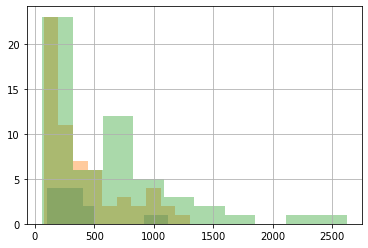

In [0]:
public_data.groupby('Histology').Maximum.hist(alpha=0.4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b458db630>,
      dtype=object)

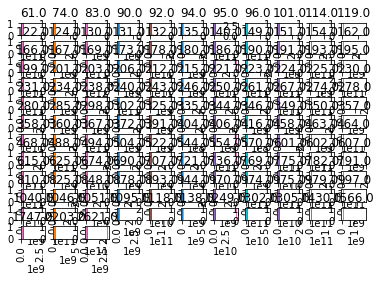

In [17]:
public_data.hist(by='Maximum', figsize=(6, 4))

Histology
adenocarcinoma             AxesSubplot(0.125,0.125;0.775x0.755)
large cell                 AxesSubplot(0.125,0.125;0.775x0.755)
squamous cell carcinoma    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Maximum, dtype: object

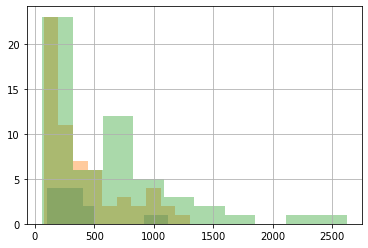

In [19]:
public_data.groupby("Histology").Maximum.hist(alpha=0.4)